In [6]:
np.logspace(0, 3, 50)

array([    1.        ,     1.1513954 ,     1.32571137,     1.52641797,
           1.75751062,     2.02358965,     2.32995181,     2.6826958 ,
           3.0888436 ,     3.55648031,     4.09491506,     4.71486636,
           5.42867544,     6.25055193,     7.19685673,     8.28642773,
           9.54095476,    10.98541142,    12.64855217,    14.56348478,
          16.76832937,    19.30697729,    22.22996483,    25.59547923,
          29.47051703,    33.93221772,    39.06939937,    44.98432669,
          51.79474679,    59.63623317,    68.6648845 ,    79.06043211,
          91.0298178 ,   104.81131342,   120.67926406,   138.94954944,
         159.98587196,   184.20699693,   212.09508879,   244.20530945,
         281.1768698 ,   323.74575428,   372.75937203,   429.19342601,
         494.17133613,   568.9866029 ,   655.12855686,   754.31200634,
         868.51137375,  1000.        ])

In [15]:
import numpy as np
def drop_zeros(a_list):
    return [i for i in a_list if i>0]

def log_binning(counter_dict,bin_count=35):

    max_x = np.log10(max(counter_dict.keys()))
    max_y = np.log10(max(counter_dict.values()))
    max_base = max([max_x,max_y])

    min_x = np.log10(min(drop_zeros(counter_dict.keys())))

    bins = np.logspace(min_x,max_base,num=bin_count)

    # Based off of: http://stackoverflow.com/questions/6163334/binning-data-in-python-with-scipy-numpy
    bin_means_y = (np.histogram(counter_dict.keys(),bins,weights=counter_dict.values())[0] / np.histogram(counter_dict.keys(),bins)[0])
    bin_means_x = (np.histogram(counter_dict.keys(),bins,weights=counter_dict.keys())[0] / np.histogram(counter_dict.keys(),bins)[0])

    return bin_means_x,bin_means_y

In [20]:
import collections
data = (np.random.random(10000)*10)**3
ba_c2 = dict(collections.Counter(data))
print(list(ba_c2.keys))

ba_x,ba_y = log_binning(ba_c2,50)

plt.xscale('log')
plt.yscale('log')
plt.scatter(ba_x,ba_y,c='r',marker='s',s=50)
plt.scatter(ba_c2.keys(),ba_c2.values(),c='b',marker='x')
plt.xlim((1e-4,1e-1))
plt.ylim((.9,1e4))
plt.xlabel('Connections (normalized)')
plt.ylabel('Frequency')
plt.show()

TypeError: 'builtin_function_or_method' object is not iterable

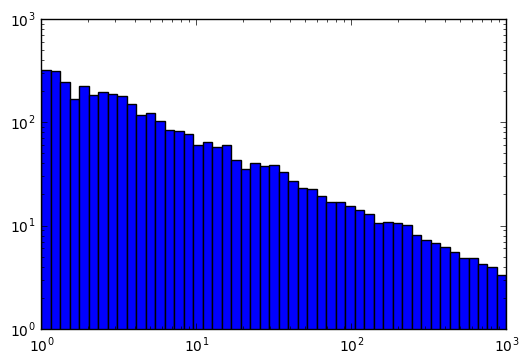

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# something random to plot
data = (np.random.random(10000)*10)**3

# log-scaled bins
bins = np.logspace(0, 3, 50)
widths = (bins[1:] - bins[:-1])

# Calculate histogram
hist = np.histogram(data, bins=bins)
# normalize by bin width
hist_norm = hist[0]/widths

# plot it!
plt.bar(bins[:-1], hist_norm, widths)
plt.xscale('log')
plt.yscale('log')

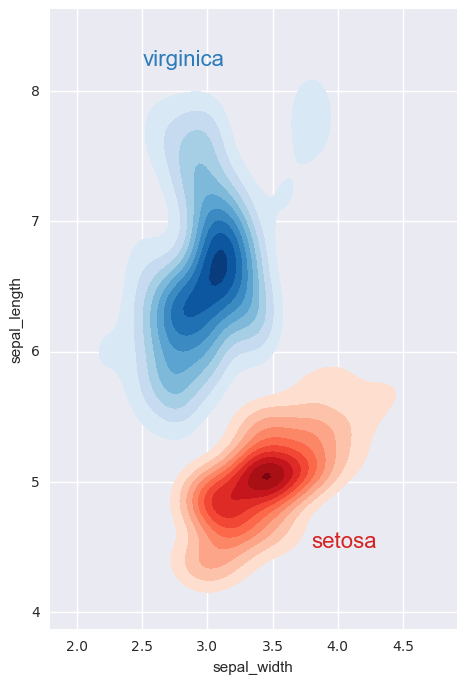

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
iris = sns.load_dataset("iris")

# Subset the iris dataset by species
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)